In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

In [53]:
df = pd.read_csv('data/transmutation_df.csv')
#df = df[df.Cancer == 'LUAD']


In [24]:
df = df[['Gene', 'P_Value', 'Mutated_Gene']]
df['P_Value'] = - np.log10(df['P_Value'])
df = df.pivot('Gene', 'Mutated_Gene', 'P_Value')

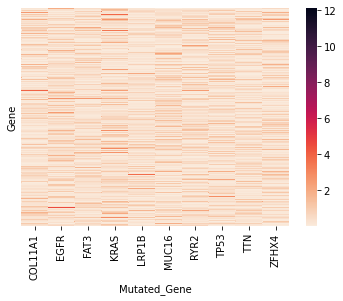

In [32]:
sns.heatmap(data = df, yticklabels=False, cmap = 'rocket_r')

In [19]:
df = pd.read_csv('data/transmutation_df.csv')
df = df[df.Cancer == 'LUAD']
df = df[['Gene', 'Delta_Correlation', 'Mutated_Gene']]
#df['P_Value'] = - np.log10(df['P_Value'])
df = df.pivot('Gene', 'Mutated_Gene', 'Delta_Correlation')

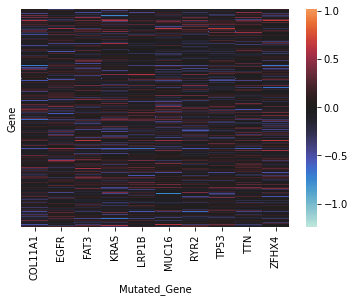

In [22]:
sns.heatmap(data = df, yticklabels=False, center = 0)

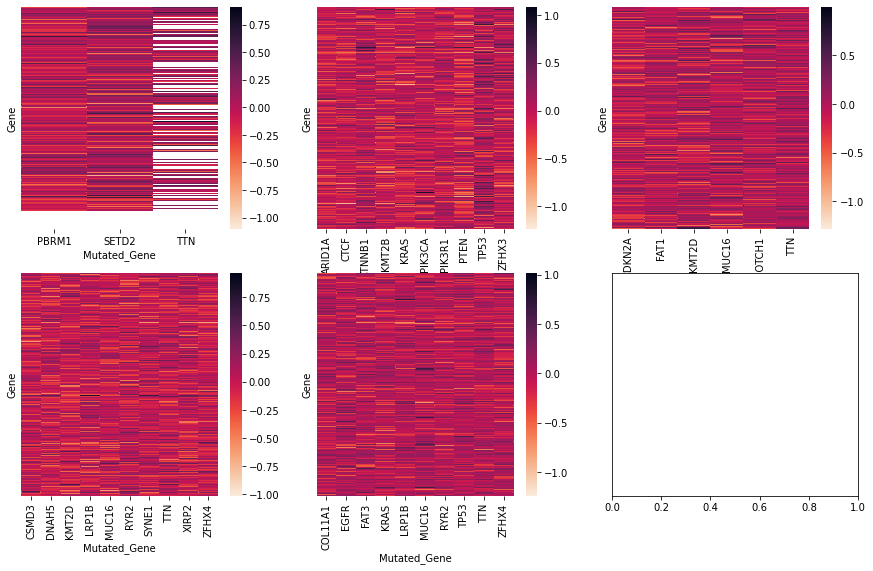

In [50]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(df.Cancer))
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    cancer_df = df[df.Cancer == cancer]
    cancer_df = cancer_df[['Gene', 'Delta_Correlation', 'Mutated_Gene']]
    cancer_df = cancer_df.pivot('Gene', 'Mutated_Gene', 'Delta_Correlation')
    plt.subplot(ax)
    sns.heatmap(data = cancer_df, yticklabels=False, cmap = 'rocket_r')

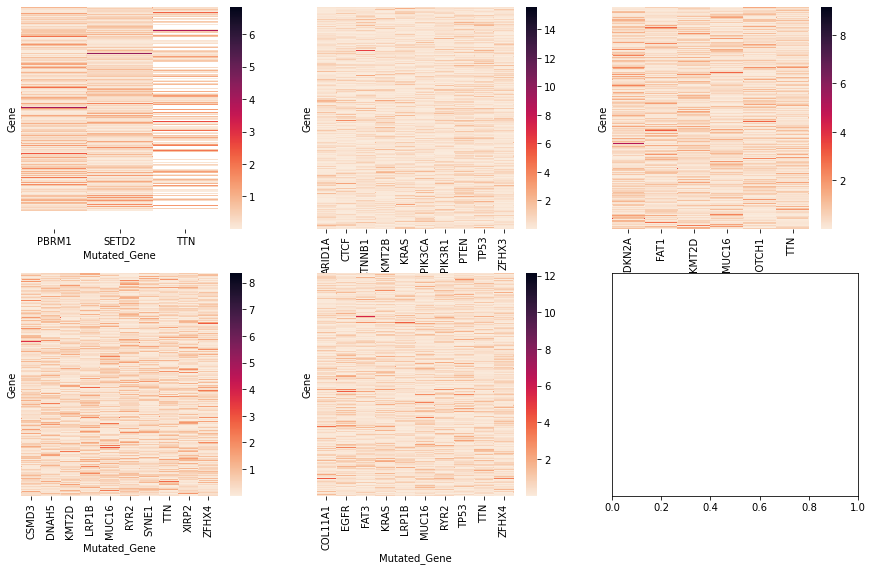

In [65]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(df.Cancer))
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    cancer_df = df[df.Cancer == cancer]
    cancer_df = cancer_df[['Gene', 'P_Value', 'Mutated_Gene']]
    cancer_df.fillna(.5)
    cancer_df['P_Value'] = - np.log10(cancer_df['P_Value'])

    cancer_df = cancer_df.pivot('Gene', 'Mutated_Gene', 'P_Value')

    plt.subplot(ax)
    sns.heatmap(data = cancer_df, yticklabels=False, cmap = 'rocket_r')

In [1]:
import cptac

In [3]:
luad = cptac.Luad()

In [34]:
luad_linc = luad.get_lincRNA()

In [9]:
delta_corr = pd.read_csv('data/delta_correlation_df.csv')
luad_delta_corr = delta_corr[delta_corr.Cancer == 'LUAD']
luad_delta_corr = luad_delta_corr[luad_delta_corr.FDR < 0.05]
luad_delta_corr

,Gene,Delta_Correlation,P_Value,FDR,Cancer
40246,A2M,0.097233,1.108125e-02,1.983739e-02,LUAD
40248,AACS,0.683092,1.237023e-36,4.203788e-35,LUAD
40249,AADAC,-0.119746,2.039017e-02,3.432714e-02,LUAD
40250,AADAT,0.630155,2.013515e-02,3.394895e-02,LUAD
40252,AAGAB,0.576050,6.057184e-14,5.710330e-13,LUAD
...,...,...,...,...,...
50298,ZWINT,0.645076,1.308967e-05,4.318432e-05,LUAD
50300,ZYG11B,0.707991,8.084098e-11,5.520566e-10,LUAD
50301,ZYX,0.472139,3.818601e-08,1.866439e-07,LUAD
50302,ZZEF1,0.418589,2.609770e-15,2.744540e-14,LUAD


In [10]:
luad_delta_corr_genes = list(luad_delta_corr.Gene)

In [40]:
import Delta_Correlation as dc
luad_prot_rna = dc.get_prot_trans_df(luad)
luad_prot_rna

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps\Delta_Correlation.py, line 26)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps\Delta_Correlation.py, line 36)


,Patient_ID,Gene,Proteomics,Tissue,Transcriptomics
0,C3L-00001,A1BG,-2.5347,Tumor,2.2545
1,C3L-00009,A1BG,-0.5627,Tumor,1.4770
2,C3L-00080,A1BG,-1.9422,Tumor,1.5103
3,C3L-00083,A1BG,2.1636,Tumor,3.0398
4,C3L-00093,A1BG,-1.0022,Tumor,1.7528
...,...,...,...,...,...
2205156,C3N-02582.N,ZZZ3,0.9497,Normal,4.2045
2205157,C3N-02586.N,ZZZ3,1.1807,Normal,4.2214
2205158,C3N-02587.N,ZZZ3,1.1825,Normal,4.0836
2205159,C3N-02588.N,ZZZ3,1.2729,Normal,4.3164


In [42]:
#luad_prot_rna['Patient_ID'] = [i.strip('.N') for i in luad_prot_rna.Patient_ID]
luad_prot_rna = luad_prot_rna[luad_prot_rna.Gene.isin(luad_delta_corr_genes)]
#luad_prot_rna
luad_prot = luad_prot_rna.drop(columns = 'Transcriptomics')
luad_prot

,Patient_ID,Gene,Proteomics,Tissue
110,C3L-00001,A2M,-3.4057,Tumor
111,C3L-00009,A2M,-1.7945,Tumor
112,C3L-00080,A2M,-2.3782,Tumor
113,C3L-00083,A2M,3.1227,Tumor
114,C3L-00093,A2M,-0.9632,Tumor
...,...,...,...,...
2205156,C3N-02582.N,ZZZ3,0.9497,Normal
2205157,C3N-02586.N,ZZZ3,1.1807,Normal
2205158,C3N-02587.N,ZZZ3,1.1825,Normal
2205159,C3N-02588.N,ZZZ3,1.2729,Normal


In [18]:
luad_prot_norm = luad_prot_rna[luad_prot_rna.Tissue == 'Normal'].drop(columns = ['Tissue', 'Transcriptomics']).rename(columns={'Proteomics': 'prot_normal'})
luad_prot_tum = luad_prot_rna[luad_prot_rna.Tissue == 'Tumor'].drop(columns = ['Tissue', 'Transcriptomics']).rename(columns={'Proteomics': 'prot_tumor'})

In [22]:
luad_prot_diff = pd.merge(luad_prot_tum, luad_prot_norm, how = 'inner')
luad_prot_diff['delta_prot'] = luad_prot_diff.prot_tumor - luad_prot_diff.prot_normal
luad_prot_diff

,Patient_ID,Gene,prot_tumor,prot_normal,delta_prot
0,C3L-00001,A2M,-3.4057,5.0086,-8.4143
1,C3L-00009,A2M,-1.7945,1.7726,-3.5671
2,C3L-00080,A2M,-2.3782,5.4187,-7.7969
3,C3L-00083,A2M,3.1227,3.5303,-0.4076
4,C3L-00093,A2M,-0.9632,4.1603,-5.1235
...,...,...,...,...,...
678322,C3N-02582,ZZZ3,-0.4097,0.9497,-1.3594
678323,C3N-02586,ZZZ3,0.9659,1.1807,-0.2148
678324,C3N-02587,ZZZ3,0.0519,1.1825,-1.1306
678325,C3N-02588,ZZZ3,0.8295,1.2729,-0.4434


In [37]:
luad_linc = luad_linc.reset_index().melt(id_vars = 'Patient_ID', value_name = 'linc', var_name = 'linc_name')
luad_linc['Tissue'] = luad_linc.Patient_ID.str.contains('.N')
luad_linc

,Patient_ID,linc_name,linc,Tissue
0,C3L-00001,AC000067.1,-3.5777,False
1,C3L-00009,AC000067.1,-2.3916,False
2,C3L-00080,AC000067.1,NaN,False
3,C3L-00083,AC000067.1,-1.7534,False
4,C3L-00093,AC000067.1,-3.0529,False
...,...,...,...,...
558934,C3N-02582.N,hsa-mir-8072,-3.1740,True
558935,C3N-02586.N,hsa-mir-8072,-2.0251,True
558936,C3N-02587.N,hsa-mir-8072,-2.4902,True
558937,C3N-02588.N,hsa-mir-8072,-1.8801,True


In [39]:
luad_linc = luad_linc.replace({True: 'Normal', False: 'Tumor'} )

In [53]:
def linc_corr(linc_df):
    df = pd.merge(linc_df, luad_prot)
    return df.groupby('Gene').apply(lambda x: dc.delta_correlation(x, cutoff = 10))

In [57]:
results = luad_linc.groupby('linc_name').apply(lambda x: linc_corr(x))
results

KeyboardInterrupt: 

In [58]:
from sklearn import linear_model

In [62]:
test_df = pd.merge(luad_prot_rna[luad_prot_rna.Gene == 'A2M'], 
                   luad_linc[luad_linc.linc_name == 'hsa-mir-8072'])
test_df

,Patient_ID,Gene,Proteomics,Tissue,Transcriptomics,linc_name,linc
0,C3L-00001,A2M,-3.4057,Tumor,8.0488,hsa-mir-8072,-1.6262
1,C3L-00009,A2M,-1.7945,Tumor,8.9855,hsa-mir-8072,-2.9726
2,C3L-00080,A2M,-2.3782,Tumor,7.4303,hsa-mir-8072,-1.3178
3,C3L-00083,A2M,3.1227,Tumor,9.4109,hsa-mir-8072,-3.3344
4,C3L-00093,A2M,-0.9632,Tumor,9.1136,hsa-mir-8072,-2.3328
...,...,...,...,...,...,...,...
134,C3N-02582.N,A2M,3.6204,Normal,10.4127,hsa-mir-8072,-3.1740
135,C3N-02586.N,A2M,1.6403,Normal,10.8147,hsa-mir-8072,-2.0251
136,C3N-02587.N,A2M,2.2513,Normal,10.1176,hsa-mir-8072,-2.4902
137,C3N-02588.N,A2M,1.7414,Normal,10.3257,hsa-mir-8072,-1.8801


In [63]:
test_df = test_df.replace({'Tumor': 1, 'Normal': 0})

In [64]:
x = test_df[['Tissue', 'Transcriptomics', 'linc']]
y = test_df['Proteomics']
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [91]:
import statsmodels.api as sm

In [92]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Proteomics   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     84.31
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           8.63e-31
Time:                        11:41:56   Log-Likelihood:                -241.36
No. Observations:                 139   AIC:                             490.7
Df Residuals:                     135   BIC:                             502.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0562      2.446     

In [78]:
import statsmodels.stats.multitest as ssm

In [83]:
diff_luad_linc = luad_linc.dropna().groupby('linc_name').apply(lambda x: scipy.stats.ttest_ind(x[x.Tissue == 'Tumor'].linc, x[x.Tissue == 'Normal'].linc)[1])
diff_luad_linc = pd.DataFrame(diff_luad_linc, columns = ['p_value'])
diff_luad_linc = diff_luad_linc.dropna()
diff_luad_linc['FDR'] = ssm.fdrcorrection(diff_luad_linc['p_value'])[1]
diff_luad_linc = diff_luad_linc[diff_luad_linc.FDR < 0.05]
diff_luad_linc_genes = diff_luad_linc.index
diff_luad_linc_genes

C:\Users\nanel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\nanel\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nanel\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Index(['AC000067.1', 'AC002511.3', 'AC003090.1', 'AC004009.3', 'AC004156.3',
       'AC004158.2', 'AC004540.5', 'AC004603.4', 'AC004947.2', 'AC005307.3',
       ...
       'XXbac-B444P24.14', 'XXbac-BPG181B23.4', 'XXbac-BPG308K3.5', 'Z83851.1',
       'Z83851.3', 'ZNF582-AS1', 'ZNF667-AS1', 'ZNF888', 'hsa-mir-7515',
       'hsa-mir-8072'],
      dtype='object', name='linc_name', length=917)

In [85]:
diff_luad_linc = luad_linc[luad_linc.linc_name.isin(diff_luad_linc_genes)]
diff_reg_prot = luad_prot_rna[luad_prot_rna.Gene.isin(luad_delta_corr_genes)]

In [87]:
diff_reg_prot

,Patient_ID,Gene,Proteomics,Tissue,Transcriptomics
110,C3L-00001,A2M,-3.4057,Tumor,8.0488
111,C3L-00009,A2M,-1.7945,Tumor,8.9855
112,C3L-00080,A2M,-2.3782,Tumor,7.4303
113,C3L-00083,A2M,3.1227,Tumor,9.4109
114,C3L-00093,A2M,-0.9632,Tumor,9.1136
...,...,...,...,...,...
2205156,C3N-02582.N,ZZZ3,0.9497,Normal,4.2045
2205157,C3N-02586.N,ZZZ3,1.1807,Normal,4.2214
2205158,C3N-02587.N,ZZZ3,1.1825,Normal,4.0836
2205159,C3N-02588.N,ZZZ3,1.2729,Normal,4.3164


In [98]:
test_genes = (pd.unique(diff_reg_prot.Gene))[0:10]
test_linc = (pd.unique(diff_luad_linc.linc_name))[0:10]

In [128]:
test_diff_reg_prot = diff_reg_prot[diff_reg_prot.Gene.isin(test_genes)]
test_diff_luad_linc = diff_luad_linc[diff_luad_linc.linc_name.isin(test_linc)]
test_df = pd.merge(test_diff_luad_linc, test_diff_reg_prot)
test_df

,Patient_ID,linc_name,linc,Tissue,Gene,Proteomics,Transcriptomics
0,C3L-00001,AC000067.1,-3.5777,Tumor,A2M,-3.4057,8.0488
1,C3L-00001,AC000067.1,-3.5777,Tumor,AACS,-1.1998,2.6953
2,C3L-00001,AC000067.1,-3.5777,Tumor,AADAC,-1.6826,-3.3578
3,C3L-00001,AC000067.1,-3.5777,Tumor,AAGAB,-0.8179,3.9955
4,C3L-00001,AC000067.1,-3.5777,Tumor,AAMP,-0.1899,5.0072
...,...,...,...,...,...,...,...
12955,C3N-02729.N,AC005307.3,-9.1684,Normal,AAMP,-0.5594,5.1410
12956,C3N-02729.N,AC005307.3,-9.1684,Normal,AAR2,-0.5335,3.4057
12957,C3N-02729.N,AC005307.3,-9.1684,Normal,AARS,-0.8970,4.8443
12958,C3N-02729.N,AC005307.3,-9.1684,Normal,AARS2,-0.5706,2.9397


In [129]:
test_df = test_df.drop(columns = 'Transcriptomics')
test_df_results = test_df.groupby(['linc_name', 'Gene', 'Tissue']).apply(lambda x: x.corr(method = 'spearman').iloc[0][1])

In [130]:
test_df_results = pd.DataFrame(test_df_results, columns = ['correlation'])
test_df_results.reset_index( inplace = True)
test_df_results

,linc_name,Gene,Tissue,correlation
0,AC000067.1,A2M,Normal,-0.146260
1,AC000067.1,A2M,Tumor,0.285862
2,AC000067.1,AACS,Normal,0.119084
3,AC000067.1,AACS,Tumor,-0.054696
4,AC000067.1,AADAC,Normal,-0.205191
...,...,...,...,...
195,AC005307.3,AARS,Tumor,-0.195827
196,AC005307.3,AARS2,Normal,-0.025539
197,AC005307.3,AARS2,Tumor,-0.324324
198,AC005307.3,AARSD1,Normal,0.128221


In [131]:
test_df_results.sort_values('correlation')

,linc_name,Gene,Tissue,correlation
7,AC000067.1,AADAT,Tumor,-0.800000
5,AC000067.1,AADAC,Tumor,-0.620098
6,AC000067.1,AADAT,Normal,-0.523810
81,AC004156.3,A2M,Tumor,-0.431660
55,AC003090.1,AARS,Tumor,-0.399497
...,...,...,...,...
35,AC002511.3,AARS,Tumor,0.337127
19,AC000067.1,AARSD1,Tumor,0.353973
149,AC004603.4,AAGAB,Tumor,0.371881
119,AC004158.2,AARSD1,Tumor,0.460116


In [136]:
diff_reg_prot = diff_reg_prot.drop(columns = ['Transcriptomics'])
dfs = []
for gene in pd.unique(diff_reg_prot.Gene):
    test_df = pd.merge(diff_reg_prot[diff_reg_prot.Gene == gene], diff_luad_linc)
    test_df_results = test_df.groupby(['linc_name', 'Gene', 'Tissue']).apply(lambda x: x.corr(method = 'spearman').iloc[0][1])
    test_df_results = pd.DataFrame(test_df_results, columns = ['correlation'])
    test_df_results.reset_index( inplace = True)
    dfs.append(test_df_results)
linc_prot_corr_df = pd.concat(dfs)
linc_prot_corr_df


,linc_name,Gene,Tissue,correlation
0,AC000067.1,A2M,Normal,-0.146260
1,AC000067.1,A2M,Tumor,0.285862
2,AC002511.3,A2M,Normal,0.267986
3,AC002511.3,A2M,Tumor,0.213262
4,AC003090.1,A2M,Normal,-0.250542
...,...,...,...,...
1829,ZNF888,ZZZ3,Tumor,-0.097141
1830,hsa-mir-7515,ZZZ3,Normal,0.017479
1831,hsa-mir-7515,ZZZ3,Tumor,-0.317647
1832,hsa-mir-8072,ZZZ3,Normal,-0.173569
